January, 2016: Getting familiarized with ANHA model output.

In [35]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Model Data

In [28]:
dataT = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_gridT_y2002m07d19.nc','r')

In [51]:
salr = dataT.variables['vosaline'][0,:]

In [3]:
grid=nc.Dataset('/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')

In [5]:
for dimobj in grid.variables.values():
    print (dimobj)

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
unlimited dimensions: 
current shape = (800, 544)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 Bathymetry(y, x)
    units: meters
    long_name: Median depth by area
unlimited dimensions: 
current shape = (800, 544)
filling off



In [53]:
bathyr = grid.variables['Bathymetry'][:]
lon = grid.variables['nav_lon'][:]
lat = grid.variables['nav_lat'][:]
bathy = np.ma.masked_where(bathyr == 0, bathyr)
sal = np.ma.masked_where(bathyr == 0, salr[0])

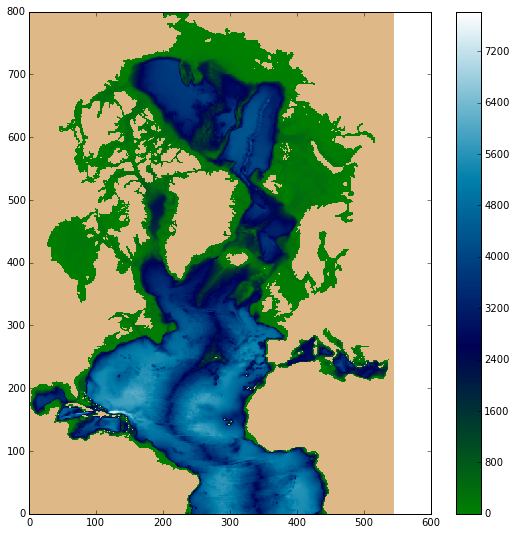

In [56]:
fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('ocean')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh, ax=ax)

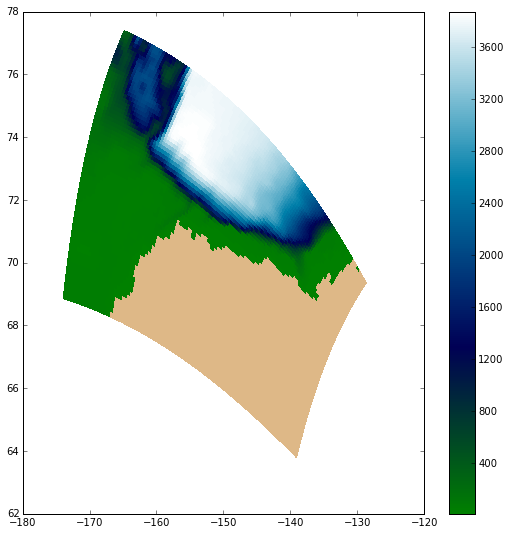

In [57]:
imin = 700; imax = 770; jmin =125; jmax= 250

fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('ocean')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], bathy[imin:imax, jmin:jmax],
                    cmap=cmap)
fig.colorbar(mesh, ax=ax)

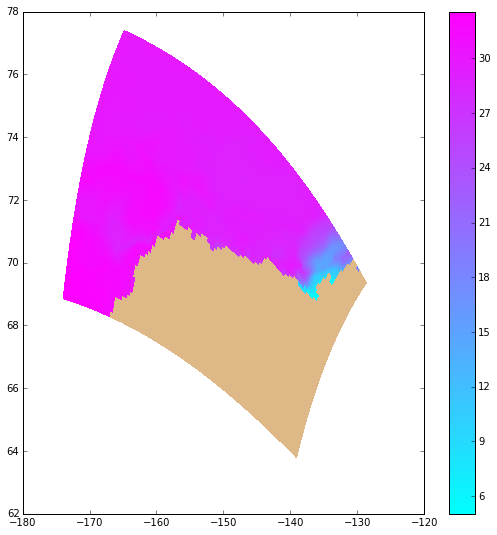

In [59]:
fig, ax = plt.subplots(1,1,figsize = (9,9))
cmap = plt.get_cmap('cool')
land_colour = 'burlywood'
cmap.set_bad(land_colour)
mesh = ax.pcolormesh(lon[imin:imax, jmin:jmax], lat[imin:imax, jmin:jmax], sal[imin:imax, jmin:jmax],
                    cmap=cmap)
fig.colorbar(mesh, ax=ax)

### Pcolormesh

(-140, -130, 68, 72)

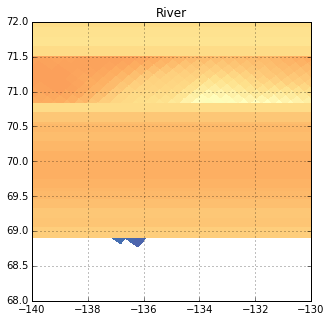

In [57]:
fig, (ax)= plt.subplots(1,1, figsize=(5, 5))
cmap = plt.get_cmap('Spectral_r')
#land_colour = 'burlywood'
#cmap.set_bad(land_colour)
#ax.set_axis_bgcolor(land_colour)
mesh = ax.pcolor(lon, lat, sal[0,0,:,:], cmap=cmap)
ax.set_title('River')
ax.grid()
ax.axis((-140, -130, 68, 72))

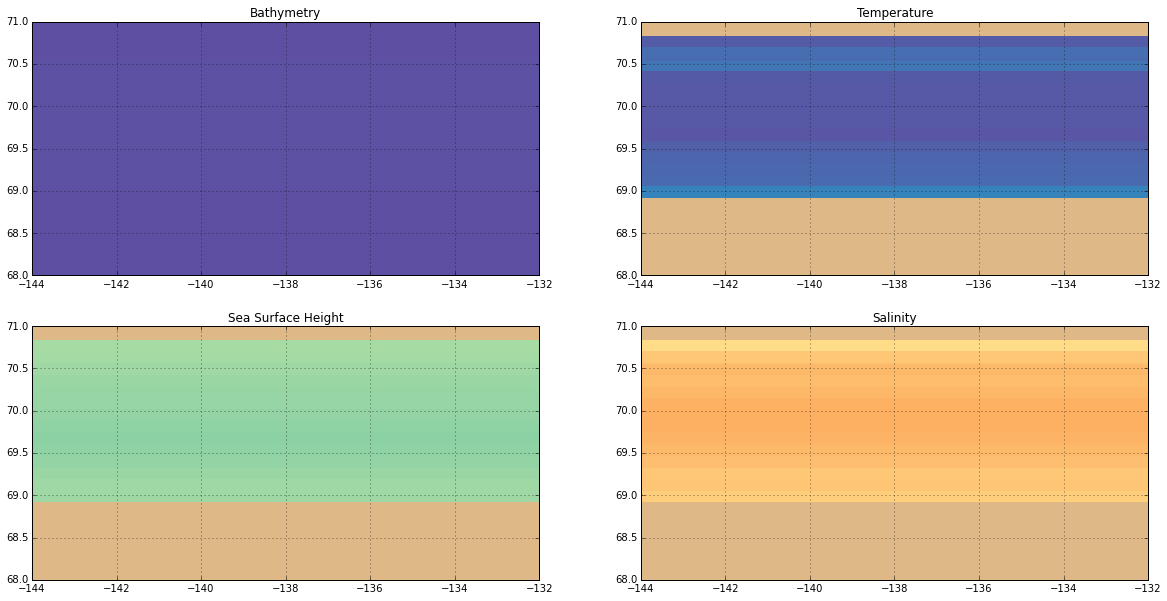

In [47]:
cmap = plt.get_cmap('Spectral_r')
land_colour = 'burlywood'
cmap.set_bad(land_colour)

def make_pcolormesh_canyon(ax, cmap, var, var_n):
    ax.set_axis_bgcolor(land_colour)
    mesh = ax.pcolormesh(lon, lat, var, cmap=cmap)
    ax.set_title(var_n)
    ax.grid()
    ax.axis((-144, -132, 68, 71))

fig, ([ax1,ax2],[ax3,ax4])= plt.subplots(2,2, figsize=(20, 10))
make_pcolormesh_canyon(ax1, cmap, bathy, 'Bathymetry')
make_pcolormesh_canyon(ax2, cmap, temp[0,0,:,:], 'Temperature')
make_pcolormesh_canyon(ax3, cmap, ssh[0,:,:], 'Sea Surface Height')
make_pcolormesh_canyon(ax4, cmap, sal[0,0,:,:], 'Salinity')


### 3D

(-50, 0, 0, -19)

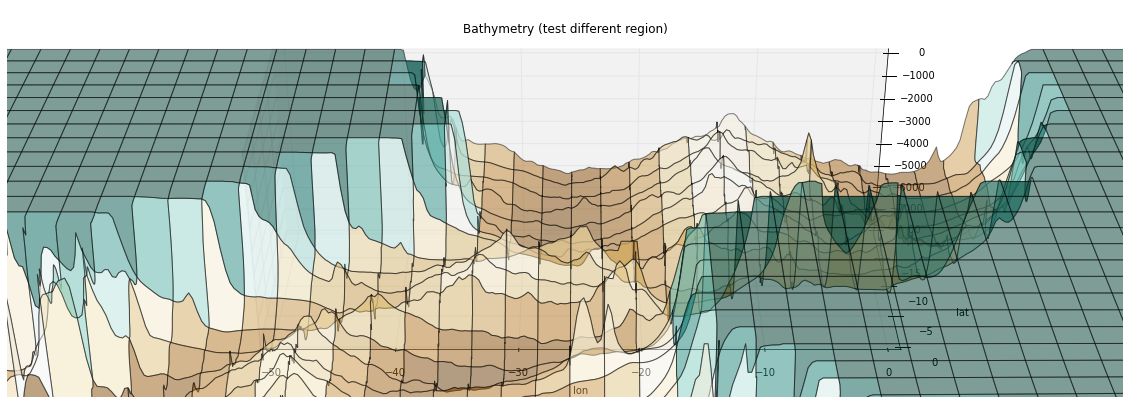

In [29]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry (test different region)')
ax.view_init(elev=30, azim=-90)

#plt.axis((-144, -132, 69, 71))
plt.axis((-50, 0, 0, -19))

(-144, -132, 69, 71)

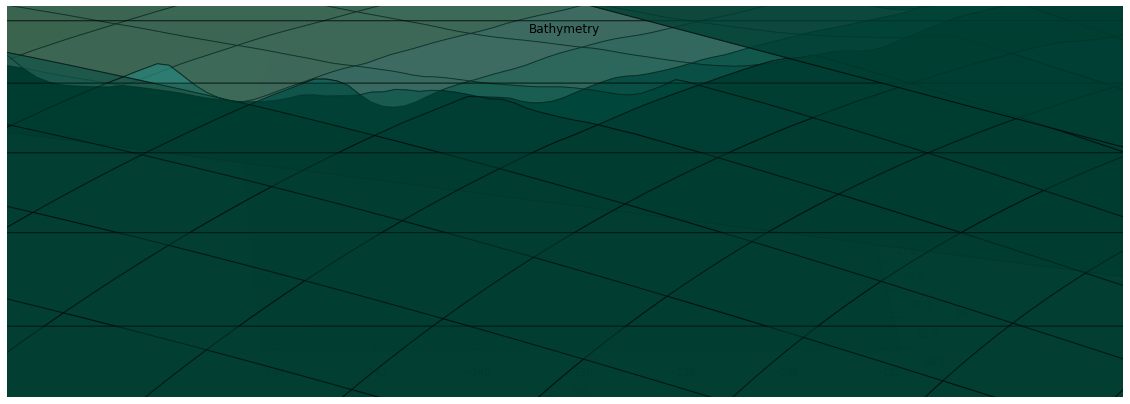

In [26]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(lon[:],lat[:],-bathy[:],cmap=cm.BrBG, alpha=0.5)
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.set_title('Bathymetry')
ax.view_init(elev=30, azim=-90)

plt.axis((-144, -132, 69, 71))